# Exoplanets: identification project

The goal for this project:
* Classify exoplanets, earth-size and smaller planet within the habitable zone, candidates obtained by the Kepler telescope
* Apply classification machine learning algorithms;
    * Logisitc Regression
    * KNN
    * Decision Tree
    * Random Foresting
    * SVM

# Background 

The Kepler Mission, a NASA Discovery mission launched on March 6, 2009, was the first space mission dedicated to the search for Earth-sized and smaller planets in the habitable zone of other stars in our neighborhood of the galaxy. Kepler was a special-purpose spacecraft that precisely measured the light variations from thousands of distant stars, looking for planetary transits. When a planet passes in front of its parent star, as seen from our solar system, it blocks a small fraction of the light from that star; this is known as a transit. Searching for transits of distant Earths is like looking for the drop in brightness when a moth flies across a searchlight. Measuring repeated transits, all with a regular period, duration and change in brightness, provides a method for discovering planets and measuring the duration of their orbits—planets the size of Earth and smaller in the habitable zone around other stars similar to our Sun. Kepler continuously monitored over 100,000 stars similar to our Sun for brightness changes produced by planetary transits.

The Kepler Mission came to an end after four years when two of the four reaction wheels, used to point the spacecraft, ceased to function. The Kepler Mission was reborn as the K2 Mission, which ran for an additional five years.


This dataset was obtained by [California Institute of Technology (Caltech)](https://exoplanetarchive.ipac.caltech.edu/index.html) which hosted NASA's exoplant Archive. 
This dataset has the most accurate and updated dispositions and stellar and planetary information. 

# Dataset

Please view [Caltech documentation](https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html) page to understand what each column/feature entails. 

The dataset will contain the original Keplar telescope observations. The target label will be either 'CONFIRMED' if the exoplanets has been identified as a earth-size and smaller planet within the habitable zone and 'FALSE POSITIVE' otherwise. The dataset will also contain 'CANDIDATE' if the observation in question is a potential candidate which will be used at the end to see if my final model can classify the candidates as 'CONFIRMED'.  

In [124]:
# Import necesssary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import to scale data
from sklearn.preprocessing import StandardScaler

# Import to perform PCA
from sklearn.decomposition import PCA

# Importing all of the models I plan to use
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Importing pipeline
from sklearn.pipeline import Pipeline

# Importing the dataset
kepler = pd.read_csv('cumulative_2020.08.31_09.15.50.csv')

In [125]:
# Looking for the features/columns
kepler.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [51]:
# Obtaining information 
kepler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2308 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impact         9201 

Looks like there are expected data type which means there's no need to change them. 

In [5]:
# Obtaining statistical information
kepler.describe()

,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,9564.000000,...,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
mean,7.690628e+06,0.480829,0.208595,0.232748,0.197512,0.120033,75.671358,0.002148,-0.002148,166.183251,...,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,292.060163,43.810433,14.264606
std,2.653459e+06,0.476928,4.767290,0.422605,0.398142,0.325018,1334.744046,0.008243,0.008243,67.918960,...,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,4.766657,3.601243,1.385448
min,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.173000,120.515914,...,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,132.761718,...,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,288.660770,40.777173,13.440000
50%,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,137.224595,...,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,292.261125,43.677504,14.520000
75%,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,-0.000005,170.694603,...,-114.000000,4.543000,0.149000,-0.088000,1.345000,0.364000,-0.069000,295.859160,46.714611,15.322000
max,1.293514e+07,1.000000,465.000000,1.000000,1.000000,1.000000,129995.778400,0.173000,0.000000,1472.522306,...,0.000000,5.364000,1.472000,0.000000,229.908000,33.091000,0.000000,301.720760,52.336010,20.003000


There are 44 differnet columns and I currently lack domain knowledge. Each of these columns could arugably be an important predictor and requires domain knowledge to determine what range of values are expected (the mean for each predictor variable for the 'CONFIRMED' target label could theoretically give us values to expect). Interepreting 44 of these predictor statistical data is highly unlikely to be of any use with my lack of domain knowledge, I will assume that each of these features are important. Some of these predictors are standard deviations for measured features reported by Kepler.

# EDA

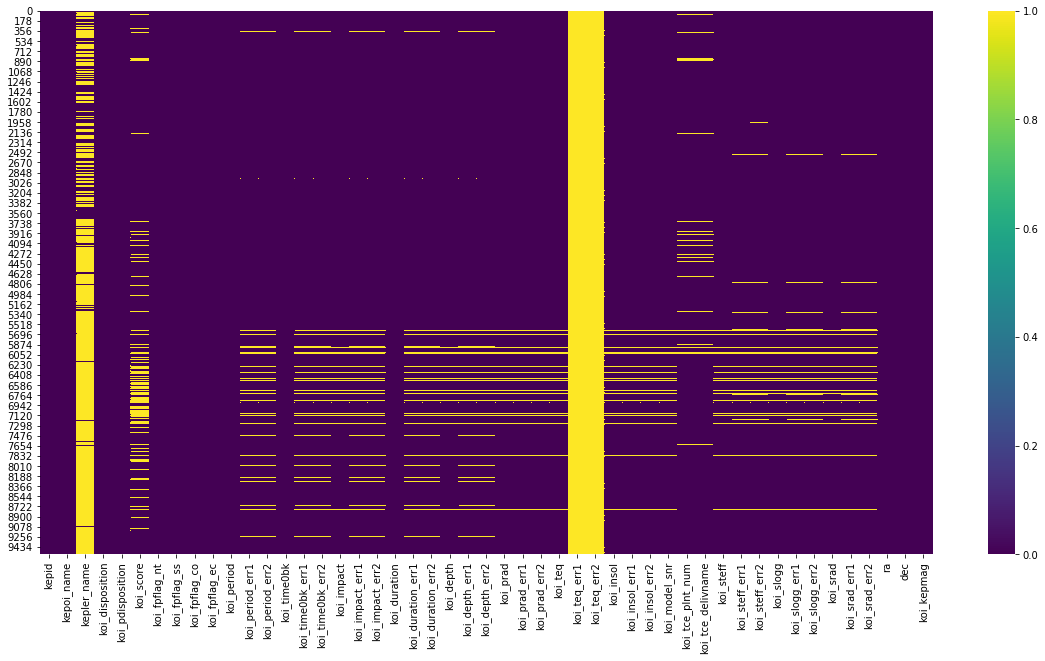

In [6]:
# Setting the plot size
plt.subplots(figsize=(20,10))

# Create heatmap of missing data
sns.heatmap(data=kepler.isnull(), cmap='viridis')

In [7]:
# Get percentage of missing data 
kepler['koi_period_err1'].isnull().mean()

0.04746967795901297

Looks like the main features(non-errors) are all roughly missing about 5% data. I will impute the NaN values dependent on case-by-case. 

### Data distributions

Some features are in pairs, I'll take a look at one of the missing feature pairs to generalize the data distributions.

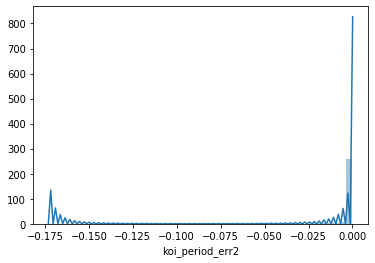

In [48]:
sns.distplot(kepler['koi_period_err2'], bins=50)

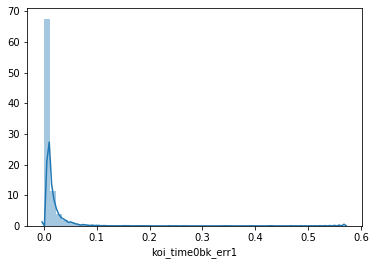

In [63]:
sns.distplot(kepler['koi_time0bk_err1'], bins=50)

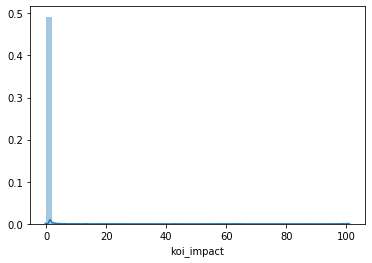

In [64]:
sns.distplot(kepler['koi_impact'], bins=50)

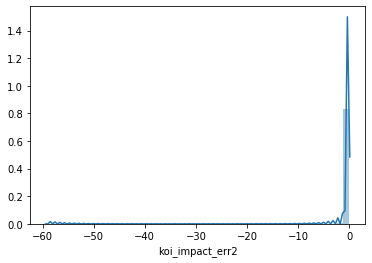

In [65]:
sns.distplot(kepler['koi_impact_err2'], bins=50)

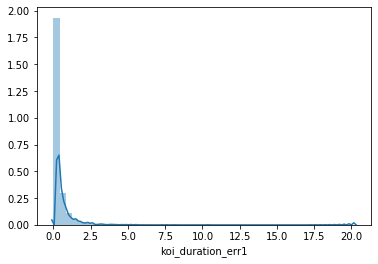

In [67]:
sns.distplot(kepler['koi_duration_err1'], bins=50)

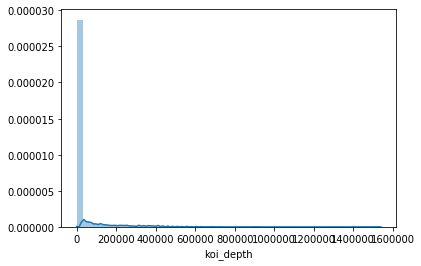

In [68]:
sns.distplot(kepler['koi_depth'], bins=50)

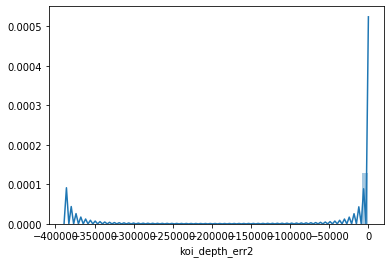

In [69]:
sns.distplot(kepler['koi_depth_err2'], bins=50)

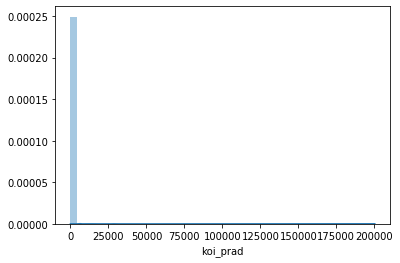

In [71]:
sns.distplot(kepler['koi_prad'], bins=50)

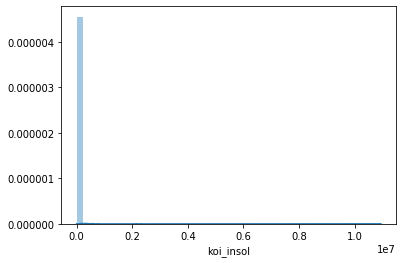

In [61]:
sns.distplot(kepler['koi_insol'], bins=50)

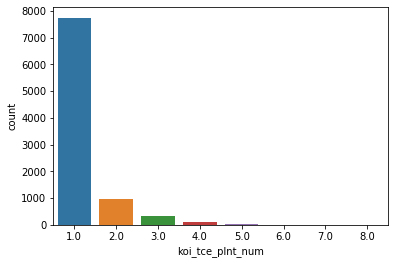

In [59]:
sns.countplot(x='koi_tce_plnt_num', data=kepler)

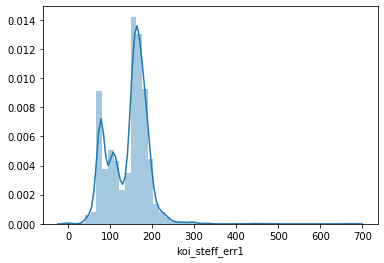

In [62]:
sns.distplot(kepler['koi_steff_err1'], bins=50)

Looking at these randomly chosen data distributions, it's clear that they're not normally distributed, there doesn't look like there's a clear type of distribution. Imputing the NaN values for each features will be done case-by-case however it looks like the missing values are all in the error features with error values being close to 0. I will be replacing the error features with the **median**.

### Target class

My target label is *'koi_disposition'*

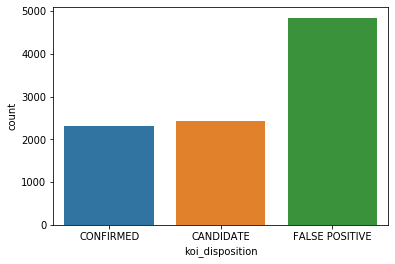

In [195]:
# Creating a countplot of the target label to understand the distribution
sns.countplot(x='koi_disposition', data=kepler)

There is a inbalance of target label with 'FALSE POSITIVE' as the majority of the label. I could do undersampling of 'FALSE POSITIVE' to get balanced targets but, I think the imbalanced target data is acceptable. I will be separating the Candidate label and placing into a separate dataset that will be used for my final model to predict.  

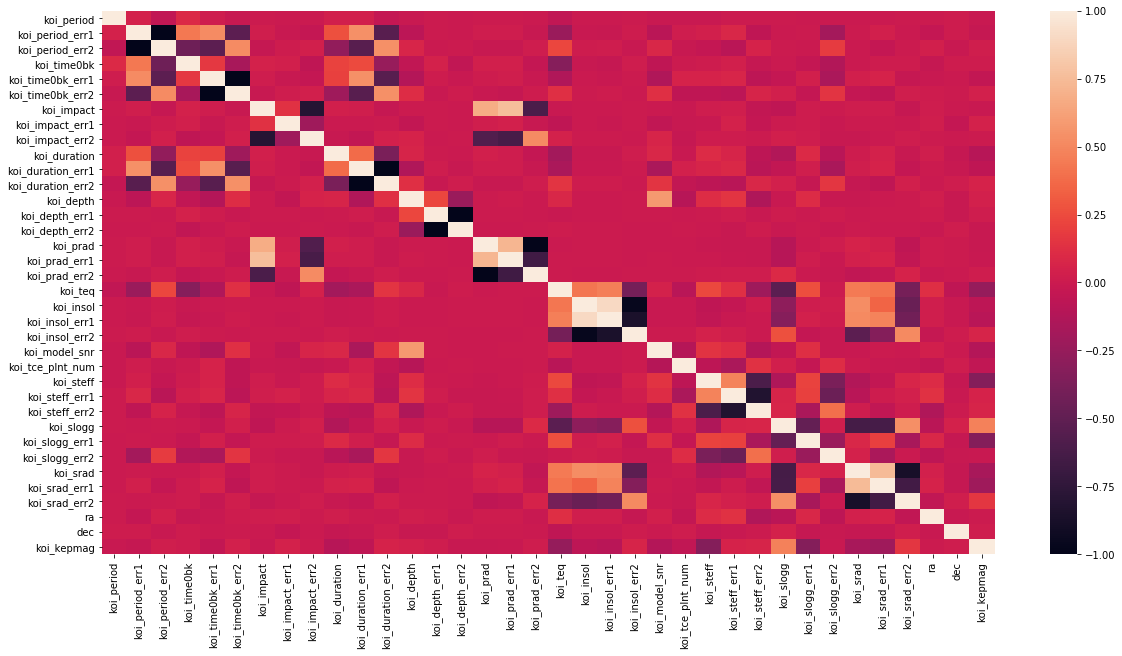

In [128]:
#Creating varaible that contains important numeric values of the kepler dataset only
kep = kepler.drop(['kepid','kepoi_name','koi_disposition','kepler_name', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_teq_err1', 
                   'koi_teq_err2', 'koi_tce_delivname'], axis=1)

# Setting the plot size
plt.subplots(figsize=(20,10))

# Created a heatmap of the correlations
sns.heatmap(kep.corr())

Looks like the majority of the correlations has to do with the error pairs (upper and lower) associated with important predictor variables which is expected.

# Prepare the data for machine learning algorithm

### Data cleaning

I'll be removing unnecessary columns in the Keplar dataset as-well as indicator columns that the algorithms will mainly use to classify the target label. I don't want the algorithm to rely soley on those columns to classify the target label. For an example, if there's any values that equals to 1 in the 'koi_fpflag_nt' column, it is automatically classified as 'FALSE POSITIVE'. None of the candidates have 1 as their values for any of the fpflag predictor variables. 

In [57]:
# Deleting the columns that are unnecessary and that might potentially be taken advantage of by the algorithm
kepler.drop(['kepler_name', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_teq_err1', 'koi_teq_err2', 'koi_tce_delivname'], axis=1, inplace = True)

In [58]:
# Creating a variable that will contain features that won't be used for imputation 
kepler_left = kepler[['kepid','kepoi_name','koi_disposition']]

# Features that will be used in have missing values imputed
kepler_right = kepler.drop(['kepid','kepoi_name','koi_disposition'], axis=1)

# Importing Scikit learn's imputer library
from sklearn.impute import SimpleImputer

# Created imputer function instance
imputer = SimpleImputer(strategy="median")

# Since we can't be sure that the new data won't have missing values, best to find median for all feature and just apply them to potential missing data.
# Fitting imputer based on the second dataset
imputer.fit(kepler_right)

# Tranforming second dataset which resulted in plain NumPy array
X = imputer.transform(kepler_right)                           

# Create a new dataframe using the imputed dataset 
kepler_right_nmv = pd.DataFrame(X, columns=kepler_right.columns, index=kepler_right.index)

# Combining the dataset that under went PCA with the dataset that wasn't used in PCA
kepler_final = pd.concat([kepler_left, kepler_right_nmv], axis=1)

# Checking the final dataset
kepler_final

,kepid,kepoi_name,koi_disposition,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,CONFIRMED,9.488036,2.780000e-05,-2.780000e-05,170.538750,0.002160,-0.002160,0.146,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,CONFIRMED,54.418383,2.480000e-04,-2.480000e-04,162.513840,0.003520,-0.003520,0.586,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,CANDIDATE,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,FALSE POSITIVE,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,CONFIRMED,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,10090151,K07985.01,FALSE POSITIVE,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,10128825,K07986.01,CANDIDATE,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,0.043,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9561,10147276,K07987.01,FALSE POSITIVE,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,-0.002850,0.147,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9562,10155286,K07988.01,CANDIDATE,333.486169,4.240000e-03,-4.240000e-03,153.615010,0.005070,-0.005070,0.214,...,-128.0,2.992,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998


### Separating candidates from target classes

In [88]:
# Separated dataframe containing the 'CANDIDATE' only target class (koi_dispositon)
kep_can = kepler_final[kepler_final.koi_disposition == 'CANDIDATE']

# Separated dataframe containing NON 'CANDIDATE' only target classs
kep_ds = kepler_final[kepler_final.koi_disposition != 'CANDIDATE']

The dataset containing the NON 'CANDIDATE' target classes will be used to train/validate/test while the 'CANDIDATE' dataset will be used to see if my final model(s) will be able to predict any other exoplanets that are earth-sized or smaller within the habitable zone of their respective sun. 

### Performance metrics 

For this project, it is better to make sure we are on the safer side and have our model with low False Negative (FN) which mean we care more about the **recall** score. We want to make sure not to easily eliminated potential planets.

In [89]:
# Importing libraries to modify scoring parameter
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

# Making new scorer
recall_scorer = make_scorer(recall_score, pos_label="CONFIRMED")

### Pipeline

I will be using PCA (Principle Component Analysis) to reduce some variables that do not explain much of the variance. I choose to use 17 components because I know that there is roughly 17 important features and all others are just errors associated with those features. If my model is performing poorly, I will try to build a model without PCA performed.

Since I am performing PCA and using multiple regression algorithms, I need to scale my data. I will need to perform separate PCA for every classifier and CV fold and for that reason, I will be creating a pipeline. I need to perform PCA for every classified and CV fold if I want to be able to measure the generalization error.

In [96]:
pipeline_lr = Pipeline([('scale1', StandardScaler()), ('pca1', PCA(n_components=17)), ('lr_class', LogisticRegression())])

pipeline_knn = Pipeline([('scale2', StandardScaler()), ('pca2', PCA(n_components=17)), ('knn_class', KNeighborsClassifier())])

pipeline_dt = Pipeline ([('scale3', StandardScaler()), ('pca3', PCA(n_components=17)), ('dt_class', DecisionTreeClassifier())])

pipeline_rf = Pipeline ([('scale4', StandardScaler()), ('pca4', PCA(n_components=17)), ('rf_class', RandomForestClassifier())])

pipeline_svr = Pipeline ([('scale5', StandardScaler()), ('pca5', PCA(n_components=17)), ('svr_class', SVC())])

# Model building (baseline)
I will build a model using baseline parameters and guage how each of the models perform by using 5 fold cross-validation. I will then perform some model tuning to see if I can further improve my models. The models used and their **Recall** score will be:
* Logistic Regression (79.6%)
* KNN (87.4%)
* Decision Tree (84.5%)
* Random Forest (90.4%)
* SVM (88.0%)

In [85]:
# Import Scikit learn's train_test_split function
from sklearn.model_selection import train_test_split

# Creating sets
X_train, X_test, y_train, y_test = train_test_split(kep_ds.drop(['kepid','kepoi_name','koi_disposition'], axis=1), kep_ds['koi_disposition'], test_size=0.25)

### Linear Regression

In [86]:
# Perform cross validation
crs = cross_val_score(pipeline_lr, X_train, y_train, cv=5, scoring=recall_scorer)
print('Average Recall Score:', crs.mean())

Average Recall Score: 0.7961071040411027


### KNN

In [73]:
crs = cross_val_score(pipeline_knn, X_train, y_train, cv=5, scoring=recall_scorer)
print('Average Recall Score:', crs.mean())

Average Recall Score: 0.8744157364438312


### Decision Tree

In [74]:
crs = cross_val_score(pipeline_dt, X_train, y_train, cv=5, scoring=recall_scorer)
print('Average Recall Score:', crs.mean())

Average Recall Score: 0.8451180721044637


### Random Forest

In [75]:
crs = cross_val_score(pipeline_rf, X_train, y_train, cv=5, scoring=recall_scorer)
print('Average Recall Score:', crs.mean())

Average Recall Score: 0.903899967947378


### SVC

In [78]:
crs = cross_val_score(pipeline_svr, X_train, y_train, cv=5, scoring=recall_scorer)
print('Average Recall Score:', crs.mean())

Average Recall Score: 0.8800146675585658


# Model tuning
After getting the baseline, I will try to tune the model to see if I can get bette performance. The models I'll be tuning and their **Recall** score is:
* Logistic Regression (80.8%)
* KNN (84.7%)
* Random Forest (81.6%)
* SVM (86.6%)

These models will be fitted with **training sets only** and are not exposed to the testset.

In [91]:
# Importing Grid Search library from Scikit-learn
from sklearn.model_selection import GridSearchCV 

In [99]:
# Created a simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Recall Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [100]:
# Setting up the hyperparameter that I plan to use
param_grid = {'lr_class__max_iter' : [1000],
              'lr_class__C' : np.logspace(-4, 4, 40)}

# Applying Grid Search
clf_lr = GridSearchCV(pipeline_lr, param_grid = param_grid, cv = 5, n_jobs = -1, refit=True, scoring=recall_scorer)

# Created a variable that will contain the tuned model with the best hyperparameters already fitted 
best_clf_lr = clf_lr.fit(X_train, y_train)

# Reporting the performance using the reporting function created earlier 
clf_performance(best_clf_lr,'Logistic Regression')

Logistic Regression
Best Recall Score: 0.8081694825939465
Best Parameters: {'lr_class__C': 88.86238162743408, 'lr_class__max_iter': 1000}


In [98]:
param_grid = {'knn_class__n_neighbors' : [3,5,7,9],
              'knn_class__algorithm' : ['auto', 'ball_tree','kd_tree'],
              'knn_class__p' : [1,2]}

clf_knn = GridSearchCV(pipeline_knn, param_grid = param_grid, cv = 5, n_jobs = -1, refit=True, scoring=recall_scorer)

best_clf_knn = clf_knn.fit(X_train, y_train)

clf_performance(best_clf_knn,'KNN')

KNN
Best Score: 0.8472137140598756
Best Parameters: {'knn_class__algorithm': 'auto', 'knn_class__n_neighbors': 3, 'knn_class__p': 1}


In [101]:
param_grid =  {'rf_class__n_estimators': [400,450,500,550],
               'rf_class__criterion':['gini','entropy'],
                                  'rf_class__bootstrap': [True],
                                  'rf_class__max_depth': [15, 20, 25],
                                  'rf_class__max_features': ['auto','sqrt', 10],
                                  'rf_class__min_samples_leaf': [2,3],
                                  'rf_class__min_samples_split': [2,3]}
                                  
clf_rf = GridSearchCV(pipeline_rf, param_grid = param_grid, cv = 5, n_jobs = -1, refit=True, scoring=recall_scorer)

best_clf_rf = clf_rf.fit(X_train, y_train)

clf_performance(best_clf_rf,'Random Forest')

Random Forest
Best Recall Score: 0.8162022856766459
Best Parameters: {'rf_class__bootstrap': True, 'rf_class__criterion': 'entropy', 'rf_class__max_depth': 25, 'rf_class__max_features': 10, 'rf_class__min_samples_leaf': 2, 'rf_class__min_samples_split': 2, 'rf_class__n_estimators': 400}


In [103]:
param_grid = tuned_parameters = [{'svr_class__kernel': ['rbf'], 'svr_class__gamma': [.1,.5,1,2,5,10],
                                  'svr_class__C': [.1, 1, 10, 100, 1000]},
                                 {'svr_class__kernel': ['linear'], 'svr_class__C': [.1, 1, 10, 100, 1000]},
                                 {'svr_class__kernel': ['poly'], 'svr_class__degree' : [2,3,4,5], 'svr_class__C': [.1, 1, 10, 100, 1000]}]

clf_svc = GridSearchCV(pipeline_svr, param_grid = param_grid, cv = 5, n_jobs = -1, refit=True, scoring=recall_scorer)

best_clf_svc = clf_svc.fit(X_train, y_train)

clf_performance(best_clf_svc,'SVC')

SVC
Best Recall Score: 0.8679000757500905
Best Parameters: {'svr_class__C': 10, 'svr_class__gamma': 0.1, 'svr_class__kernel': 'rbf'}


# Model evaluation on testset
I will be using all of my tuned models to predict using X_test dataset and compare it y_test as a final evaluation of my models. **These models have not been exposed to the testset**.

In [104]:
# Imported the classification metrics 
from sklearn.metrics import confusion_matrix, classification_report

In [113]:
# Created a variable that contains the predictions from X_test
log_pred = best_clf_lr.predict(X_test)

# Printed classification metrics comparing y_test and model prediction's
print('Logisitc Regression: \n', classification_report(y_test,log_pred))


kn_pred = best_clf_knn.predict(X_test)
print('\n K Nearest Neighbour: \n', classification_report(y_test,kn_pred))


rff_pred = best_clf_rf.predict(X_test)
print('\n Random Forest: \n', classification_report(y_test,rff_pred))


sv_pred = best_clf_svc.predict(X_test)
print('\n SVC: \n', classification_report(y_test,sv_pred))

Logisitc Regression: 
                 precision    recall  f1-score   support

     CONFIRMED       0.80      0.75      0.77       565
FALSE POSITIVE       0.89      0.91      0.90      1222

      accuracy                           0.86      1787
     macro avg       0.84      0.83      0.84      1787
  weighted avg       0.86      0.86      0.86      1787


 K Nearest Neighbour: 
                 precision    recall  f1-score   support

     CONFIRMED       0.81      0.84      0.82       565
FALSE POSITIVE       0.93      0.91      0.92      1222

      accuracy                           0.89      1787
     macro avg       0.87      0.87      0.87      1787
  weighted avg       0.89      0.89      0.89      1787


 Random Forest: 
                 precision    recall  f1-score   support

     CONFIRMED       0.87      0.80      0.84       565
FALSE POSITIVE       0.91      0.95      0.93      1222

      accuracy                           0.90      1787
     macro avg       0.89    

The final **recall** score on the testset are:
* Logistic Regression (86%)
* KNN (89%)
* Random Forest (90%)
* SVM (91%)

# Model predictions
I will now use my models to see if it could find new Exoplanets, earth-size and in the habitable zone, with the 'CANDIDATE' only dataset that I set apart earlier. 

In [114]:
# Created a variable that will contain 'CANDIDATE' only dataset without object data types
kep_can_val = kep_can.drop(['kepid','kepoi_name','koi_disposition'], axis=1)

# Created variable with tuned model predictions of the 'CANDIDATES'
svcr = best_clf_svc.predict(kep_can_val)
rfr = best_clf_rf.predict(kep_can_val)

# Creating a new columnn on the 'CANDIDATE' only dataset with the models predictions 
kep_can['Predictions by SVM'] = svcr
kep_can['Predictions by RF'] = rfr
 
kep_can

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,kepid,kepoi_name,koi_disposition,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,...,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,Predictions by SVM,Predictions by RF
2,10811496,K00753.01,CANDIDATE,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,...,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,FALSE POSITIVE,CONFIRMED
37,11138155,K00760.01,CANDIDATE,4.959319,5.150000e-07,-5.150000e-07,172.258529,0.000083,-0.000083,0.831,...,0.110,-0.110,1.082,0.173,-0.130,292.16705,48.727589,15.263,CONFIRMED,CONFIRMED
58,11818800,K00777.01,CANDIDATE,40.419504,1.140000e-04,-1.140000e-04,173.564690,0.002220,-0.002220,0.911,...,0.116,-0.105,0.781,0.116,-0.095,294.31686,50.080231,15.487,FALSE POSITIVE,FALSE POSITIVE
62,11918099,K00780.02,CANDIDATE,7.240661,1.620000e-05,-1.620000e-05,137.755450,0.002000,-0.002000,1.198,...,0.012,-0.064,0.765,0.055,-0.028,293.83331,50.230350,15.334,FALSE POSITIVE,FALSE POSITIVE
63,9579641,K00115.03,CANDIDATE,3.435916,4.730000e-05,-4.730000e-05,132.662400,0.011000,-0.011000,0.624,...,0.132,-0.108,1.087,0.157,-0.142,287.88733,46.276241,12.791,CONFIRMED,CONFIRMED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9538,9938836,K07978.01,CANDIDATE,7.268182,1.640000e-04,-1.640000e-04,135.934800,0.023500,-0.023500,0.780,...,0.405,-0.135,2.219,0.536,-0.996,285.30768,46.829803,13.729,FALSE POSITIVE,FALSE POSITIVE
9542,10011213,K07982.01,CANDIDATE,376.379890,4.680000e-02,-4.680000e-02,486.602200,0.071100,-0.071100,0.305,...,0.054,-0.216,0.955,0.291,-0.097,291.60455,46.973289,15.632,FALSE POSITIVE,FALSE POSITIVE
9552,10028127,K08193.01,CANDIDATE,367.947848,4.790000e-03,-4.790000e-03,416.209980,0.009720,-0.009720,0.902,...,0.030,-0.170,0.855,0.207,-0.069,297.73398,46.961529,15.719,FALSE POSITIVE,FALSE POSITIVE
9560,10128825,K07986.01,CANDIDATE,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,0.043,...,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757,FALSE POSITIVE,FALSE POSITIVE


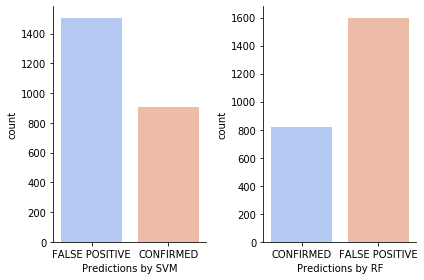

In [115]:
# Create a countplot of classification 
fig, ax =plt.subplots(1,2)
sns.countplot(kep_can['Predictions by SVM'], ax=ax[0],palette='coolwarm')
sns.countplot(kep_can['Predictions by RF'], ax=ax[1], palette='coolwarm')
plt.tight_layout()
sns.despine()

In [116]:
print('Predictions by SVM: ', sum(kep_can['Predictions by SVM'] == 'CONFIRMED'))
print('Predictions by RF: ', sum(kep_can['Predictions by RF'] == 'CONFIRMED'))

Predictions by SVM:  910
Predictions by RF:  818


# Conclusion

Under normal circumstances I would only report one model, whether it be an ensemble of models or one classification model but I was curious on what my best two models would predict and how differnet they were when it comes to predicting unseen candidate data.
* SVC predicted there would be 910 potential earth-sized and smaller within the habitable zone
* Random Forest prediced there would be 818 potential earthh-sized and smaller within the habitable zone


# Final thoughts 

In this project, I've built miltiple models to predict whether the candidate exoplanet is earth-size or smaller and is in the habitable zone or not. Since this is a Classification problem, the models and final **recall** performance on the **testset only** was;
* Logistic Regression (86%)
* KNN (89%)
* Random Forest (90%)
* SVM (91%)

As you can see, the best performing model was SVM & Random Foresting. In general, models can be further improved by:
* Getting more data 
* Balance the target values by undersampling the 'FALSE POSITIVES'

There are many things I could learn such as but not limited to:
* Learning Other models 
    * Naive Bayes
    * Extreme Gradiant boosting 
* Apply ensemble approach (use a combination of different models)